In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## By Date

In [5]:
# Read data files
central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'Central Region')
east = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'East Region')
north_central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Central')
north_coastal = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Costal')
north_inland = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Inland')
south = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'South Region')

# Set headers
central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
east.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
north_central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
north_coastal.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
north_inland.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
south.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']

# Transform data to datetime format
central['Date'] = pd.to_datetime(central['Date'])
east['Date'] = pd.to_datetime(east['Date'])
north_central['Date'] = pd.to_datetime(north_central['Date'])
north_coastal['Date'] = pd.to_datetime(north_coastal['Date'])
north_inland['Date'] = pd.to_datetime(north_inland['Date'])
south['Date'] = pd.to_datetime(south['Date'])

In [33]:
central.head()

,Case Count (Raw),Total Rate (Suppressed),Date
0,296,57.1659,2020-04-03
1,324,62.5735,2020-04-05
2,350,67.5948,2020-04-06
3,368,71.0711,2020-04-07
4,392,75.7062,2020-04-08


Text(0.5, 1.0, 'Case Count (Raw)')

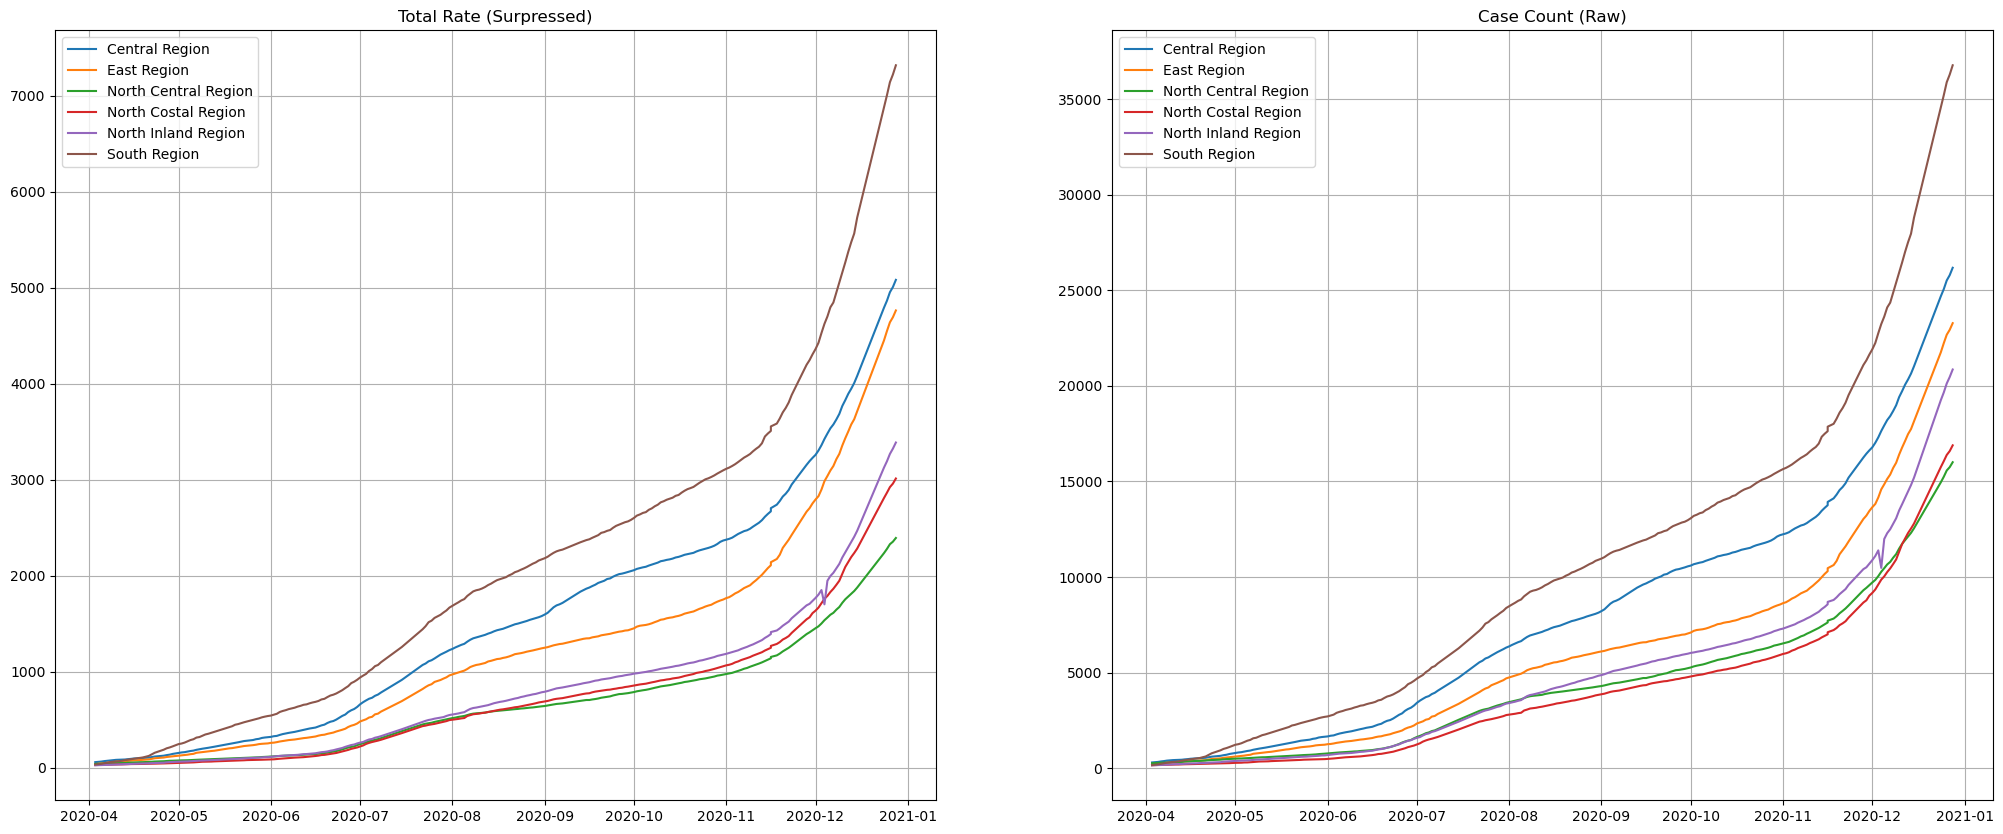

In [6]:
# Plot raw and total cases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(central['Date'], central['Total Rate (Suppressed)'], label = 'Central Region')
ax1.plot(east['Date'], east['Total Rate (Suppressed)'], label = 'East Region')
ax1.plot(north_central['Date'], north_central['Total Rate (Suppressed)'], label = 'North Central Region')
ax1.plot(north_coastal['Date'], north_coastal['Total Rate (Suppressed)'], label = 'North Costal Region')
ax1.plot(north_inland['Date'], north_inland['Total Rate (Suppressed)'], label = 'North Inland Region')
ax1.plot(south['Date'], south['Total Rate (Suppressed)'], label = 'South Region')
ax1.grid()
ax1.legend()
ax1.set_title('Total Rate (Surpressed)')

ax2.plot(central['Date'], central['Case Count (Raw)'], label = 'Central Region')
ax2.plot(east['Date'], east['Case Count (Raw)'], label = 'East Region')
ax2.plot(north_central['Date'], north_central['Case Count (Raw)'], label = 'North Central Region')
ax2.plot(north_coastal['Date'], north_coastal['Case Count (Raw)'], label = 'North Costal Region')
ax2.plot(north_inland['Date'], north_inland['Case Count (Raw)'], label = 'North Inland Region')
ax2.plot(south['Date'], south['Case Count (Raw)'], label = 'South Region')
ax2.grid()
ax2.legend()
ax2.set_title('Case Count (Raw)')

In [7]:
# Count daily cases
central_daily_total = central['Total Rate (Suppressed)'].diff()
central_daily_raw = central['Case Count (Raw)'].diff()
east_daily_total = east['Total Rate (Suppressed)'].diff()
east_daily_raw = east['Case Count (Raw)'].diff()
north_central_daily_total = north_central['Total Rate (Suppressed)'].diff()
north_central_daily_raw = north_central['Case Count (Raw)'].diff()
north_coastal_daily_total = north_coastal['Total Rate (Suppressed)'].diff()
north_coastal_daily_raw = north_coastal['Case Count (Raw)'].diff()
north_inland_daily_total = north_inland['Total Rate (Suppressed)'].diff()
north_inland_daily_raw = north_inland['Case Count (Raw)'].diff()
south_daily_total = south['Total Rate (Suppressed)'].diff()
south_daily_raw = south['Case Count (Raw)'].diff()

In [26]:
central['Date'][75:90]

75   2020-07-01
76   2020-07-02
77   2020-07-03
78   2020-07-04
79   2020-07-05
80   2020-07-06
81   2020-07-07
82   2020-07-08
83   2020-07-15
84   2020-07-22
85   2020-07-23
86   2020-07-24
87   2020-07-25
88   2020-07-26
89   2020-07-28
Name: Date, dtype: datetime64[ns]

Text(0.5, 1.0, 'Daily Total Rate (Surpressed)')

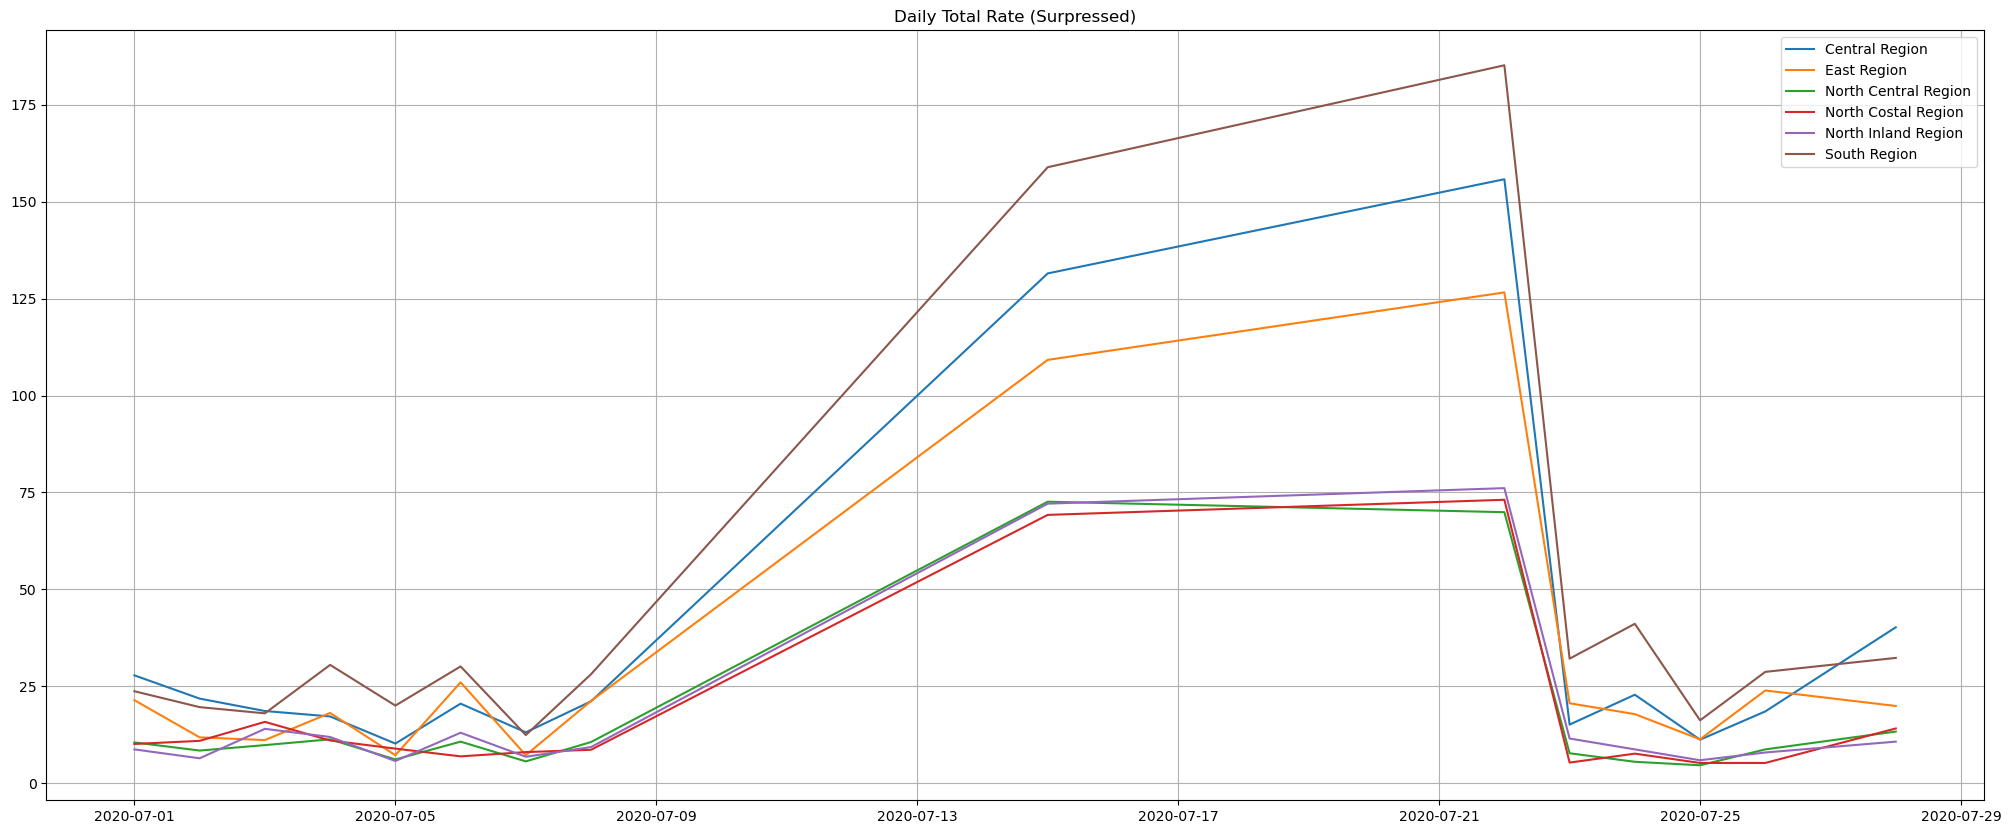

In [32]:
# Plot Raw and Total daily cases
fig, ax1 = plt.subplots(figsize = (25, 10))
ax1.plot(central['Date'][75:90], central_daily_total[75:90], label = 'Central Region')
ax1.plot(east['Date'][75:90], east_daily_total[75:90], label = 'East Region')
ax1.plot(north_central['Date'][75:90], north_central_daily_total[75:90], label = 'North Central Region')
ax1.plot(north_coastal['Date'][75:90], north_coastal_daily_total[75:90], label = 'North Costal Region')
ax1.plot(north_inland['Date'][75:90], north_inland_daily_total[75:90], label = 'North Inland Region')
ax1.plot(south['Date'][75:90], south_daily_total[75:90], label = 'South Region')
ax1.grid()
ax1.legend()
ax1.set_title('Daily Total Rate (Surpressed)')

# # Plot Raw and Total daily cases
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
# ax1.plot(central['Date'], central_daily_total, label = 'Central Region')
# ax1.plot(east['Date'], east_daily_total, label = 'East Region')
# ax1.plot(north_central['Date'], north_central_daily_total, label = 'North Central Region')
# ax1.plot(north_coastal['Date'], north_coastal_daily_total, label = 'North Costal Region')
# ax1.plot(north_inland['Date'], north_inland_daily_total, label = 'North Inland Region')
# ax1.plot(south['Date'], south_daily_total, label = 'South Region')
# ax1.grid()
# ax1.legend()
# ax1.set_title('Daily Total Rate (Surpressed)')

# ax2.plot(central['Date'], central_daily_raw, label = 'Central Region')
# ax2.plot(east['Date'], east_daily_raw, label = 'East Region')
# ax2.plot(north_central['Date'], north_central_daily_raw, label = 'North Central Region')
# ax2.plot(north_coastal['Date'], north_coastal_daily_raw, label = 'North Costal Region')
# ax2.plot(north_inland['Date'], north_inland_daily_raw, label = 'North Inland Region')
# ax2.plot(south['Date'], south_daily_raw, label = 'South Region')
# ax2.grid()
# ax2.legend()
# ax2.set_title('Daily Case Count (Raw)')

In [34]:
central['Date'][75:90]

75   2020-07-01
76   2020-07-02
77   2020-07-03
78   2020-07-04
79   2020-07-05
80   2020-07-06
81   2020-07-07
82   2020-07-08
83   2020-07-15
84   2020-07-22
85   2020-07-23
86   2020-07-24
87   2020-07-25
88   2020-07-26
89   2020-07-28
Name: Date, dtype: datetime64[ns]

## By Age

In [10]:
# Read data files
age_0_9 = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/0-9/all-0_9.csv", header = None)
age_10_19 = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/10-19/all-10_19.csv", header = None)
age_20_29 = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/20-29/all-20_29.csv", header = None)
age_30_39 = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/30-39/all-30_39.csv", header = None)
age_40_49 = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/40-49/all-40_49.csv", header = None)
age_50_59 = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/50-59/all-50_59.csv", header = None)
age_60_69 = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/60-69/all-60_69.csv", header = None)
age_70_79 = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/70-79/all-70_79.csv", header = None)
age_80plus = pd.read_csv("/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Age/80Plus/all-80plus.csv", header = None)

# Set header names
age_0_9.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
age_10_19.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
age_20_29.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
age_30_39.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
age_40_49.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
age_50_59.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
age_60_69.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
age_70_79.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
age_80plus.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']

In [11]:
central_0_9 = age_0_9[age_0_9['Regions'] == 'Central_Region']
central_10_19 = age_10_19[age_10_19['Regions'] == 'Central_Region']
central_20_29 = age_20_29[age_20_29['Regions'] == 'Central_Region']
central_30_39 = age_30_39[age_30_39['Regions'] == 'Central_Region']
central_40_49 = age_40_49[age_40_49['Regions'] == 'Central_Region']
central_50_59 = age_50_59[age_50_59['Regions'] == 'Central_Region']
central_60_69 = age_60_69[age_60_69['Regions'] == 'Central_Region']
central_70_79 = age_70_79[age_70_79['Regions'] == 'Central_Region']
central_80plus = age_80plus[age_80plus['Regions'] == 'Central_Region']

east_0_9 = age_0_9[age_0_9['Regions'] == 'East_Region']
east_10_19 = age_10_19[age_10_19['Regions'] == 'East_Region']
east_20_29 = age_20_29[age_20_29['Regions'] == 'East_Region']
east_30_39 = age_30_39[age_30_39['Regions'] == 'East_Region']
east_40_49 = age_40_49[age_40_49['Regions'] == 'East_Region']
east_50_59 = age_50_59[age_50_59['Regions'] == 'East_Region']
east_60_69 = age_60_69[age_60_69['Regions'] == 'East_Region']
east_70_79 = age_70_79[age_70_79['Regions'] == 'East_Region']
east_80plus = age_80plus[age_80plus['Regions'] == 'East_Region']

north_central_0_9 = age_0_9[age_0_9['Regions'] == 'North_Central_Region']
north_central_10_19 = age_10_19[age_10_19['Regions'] == 'North_Central_Region']
north_central_20_29 = age_20_29[age_20_29['Regions'] == 'North_Central_Region']
north_central_30_39 = age_30_39[age_30_39['Regions'] == 'North_Central_Region']
north_central_40_49 = age_40_49[age_40_49['Regions'] == 'North_Central_Region']
north_central_50_59 = age_50_59[age_50_59['Regions'] == 'North_Central_Region']
north_central_60_69 = age_60_69[age_60_69['Regions'] == 'North_Central_Region']
north_central_70_79 = age_70_79[age_70_79['Regions'] == 'North_Central_Region']
north_central_80plus = age_80plus[age_80plus['Regions'] == 'North_Central_Region']

north_coastal_0_9 = age_0_9[age_0_9['Regions'] == 'North_Coastal_Region']
north_coastal_10_19 = age_10_19[age_10_19['Regions'] == 'North_Coastal_Region']
north_coastal_20_29 = age_20_29[age_20_29['Regions'] == 'North_Coastal_Region']
north_coastal_30_39 = age_30_39[age_30_39['Regions'] == 'North_Coastal_Region']
north_coastal_40_49 = age_40_49[age_40_49['Regions'] == 'North_Coastal_Region']
north_coastal_50_59 = age_50_59[age_50_59['Regions'] == 'North_Coastal_Region']
north_coastal_60_69 = age_60_69[age_60_69['Regions'] == 'North_Coastal_Region']
north_coastal_70_79 = age_70_79[age_70_79['Regions'] == 'North_Coastal_Region']
north_coastal_80plus = age_80plus[age_80plus['Regions'] == 'North_Coastal_Region']

north_inland_0_9 = age_0_9[age_0_9['Regions'] == 'North_Inland_Region']
north_inland_10_19 = age_10_19[age_10_19['Regions'] == 'North_Inland_Region']
north_inland_20_29 = age_20_29[age_20_29['Regions'] == 'North_Inland_Region']
north_inland_30_39 = age_30_39[age_30_39['Regions'] == 'North_Inland_Region']
north_inland_40_49 = age_40_49[age_40_49['Regions'] == 'North_Inland_Region']
north_inland_50_59 = age_50_59[age_50_59['Regions'] == 'North_Inland_Region']
north_inland_60_69 = age_60_69[age_60_69['Regions'] == 'North_Inland_Region']
north_inland_70_79 = age_70_79[age_70_79['Regions'] == 'North_Inland_Region']
north_inland_80plus = age_80plus[age_80plus['Regions'] == 'North_Inland_Region']

south_0_9 = age_0_9[age_0_9['Regions'] == 'South_Region']
south_10_19 = age_10_19[age_10_19['Regions'] == 'South_Region']
south_20_29 = age_20_29[age_20_29['Regions'] == 'South_Region']
south_30_39 = age_30_39[age_30_39['Regions'] == 'South_Region']
south_40_49 = age_40_49[age_40_49['Regions'] == 'South_Region']
south_50_59 = age_50_59[age_50_59['Regions'] == 'South_Region']
south_60_69 = age_60_69[age_60_69['Regions'] == 'South_Region']
south_70_79 = age_70_79[age_70_79['Regions'] == 'South_Region']
south_80plus = age_80plus[age_80plus['Regions'] == 'South_Region']

In [12]:
central_0_9.sort_values(by = 'Date', inplace = True)
central_10_19.sort_values(by = 'Date', inplace = True)
central_20_29.sort_values(by = 'Date', inplace = True)
central_30_39.sort_values(by = 'Date', inplace = True)
central_40_49.sort_values(by = 'Date', inplace = True)
central_50_59.sort_values(by = 'Date', inplace = True)
central_60_69.sort_values(by = 'Date', inplace = True)
central_70_79.sort_values(by = 'Date', inplace = True)
central_80plus.sort_values(by = 'Date', inplace = True)

east_0_9.sort_values(by = 'Date', inplace = True)
east_10_19.sort_values(by = 'Date', inplace = True)
east_20_29.sort_values(by = 'Date', inplace = True)
east_30_39.sort_values(by = 'Date', inplace = True)
east_40_49.sort_values(by = 'Date', inplace = True)
east_50_59.sort_values(by = 'Date', inplace = True)
east_60_69.sort_values(by = 'Date', inplace = True)
east_70_79.sort_values(by = 'Date', inplace = True)
east_80plus.sort_values(by = 'Date', inplace = True)

north_central_0_9.sort_values(by = 'Date', inplace = True)
north_central_10_19.sort_values(by = 'Date', inplace = True)
north_central_20_29.sort_values(by = 'Date', inplace = True)
north_central_30_39.sort_values(by = 'Date', inplace = True)
north_central_40_49.sort_values(by = 'Date', inplace = True)
north_central_50_59.sort_values(by = 'Date', inplace = True)
north_central_60_69.sort_values(by = 'Date', inplace = True)
north_central_70_79.sort_values(by = 'Date', inplace = True)
north_central_80plus.sort_values(by = 'Date', inplace = True)

north_coastal_0_9.sort_values(by = 'Date', inplace = True)
north_coastal_10_19.sort_values(by = 'Date', inplace = True)
north_coastal_20_29.sort_values(by = 'Date', inplace = True)
north_coastal_30_39.sort_values(by = 'Date', inplace = True)
north_coastal_40_49.sort_values(by = 'Date', inplace = True)
north_coastal_50_59.sort_values(by = 'Date', inplace = True)
north_coastal_60_69.sort_values(by = 'Date', inplace = True)
north_coastal_70_79.sort_values(by = 'Date', inplace = True)
north_coastal_80plus.sort_values(by = 'Date', inplace = True)

north_inland_0_9.sort_values(by = 'Date', inplace = True)
north_inland_10_19.sort_values(by = 'Date', inplace = True)
north_inland_20_29.sort_values(by = 'Date', inplace = True)
north_inland_30_39.sort_values(by = 'Date', inplace = True)
north_inland_40_49.sort_values(by = 'Date', inplace = True)
north_inland_50_59.sort_values(by = 'Date', inplace = True)
north_inland_60_69.sort_values(by = 'Date', inplace = True)
north_inland_70_79.sort_values(by = 'Date', inplace = True)
north_inland_80plus.sort_values(by = 'Date', inplace = True)

south_0_9.sort_values(by = 'Date', inplace = True)
south_10_19.sort_values(by = 'Date', inplace = True)
south_20_29.sort_values(by = 'Date', inplace = True)
south_30_39.sort_values(by = 'Date', inplace = True)
south_40_49.sort_values(by = 'Date', inplace = True)
south_50_59.sort_values(by = 'Date', inplace = True)
south_60_69.sort_values(by = 'Date', inplace = True)
south_70_79.sort_values(by = 'Date', inplace = True)
south_80plus.sort_values(by = 'Date', inplace = True)

================================Central Region========================================


Text(0.5, 1.0, 'Daily Case Count (Raw)')

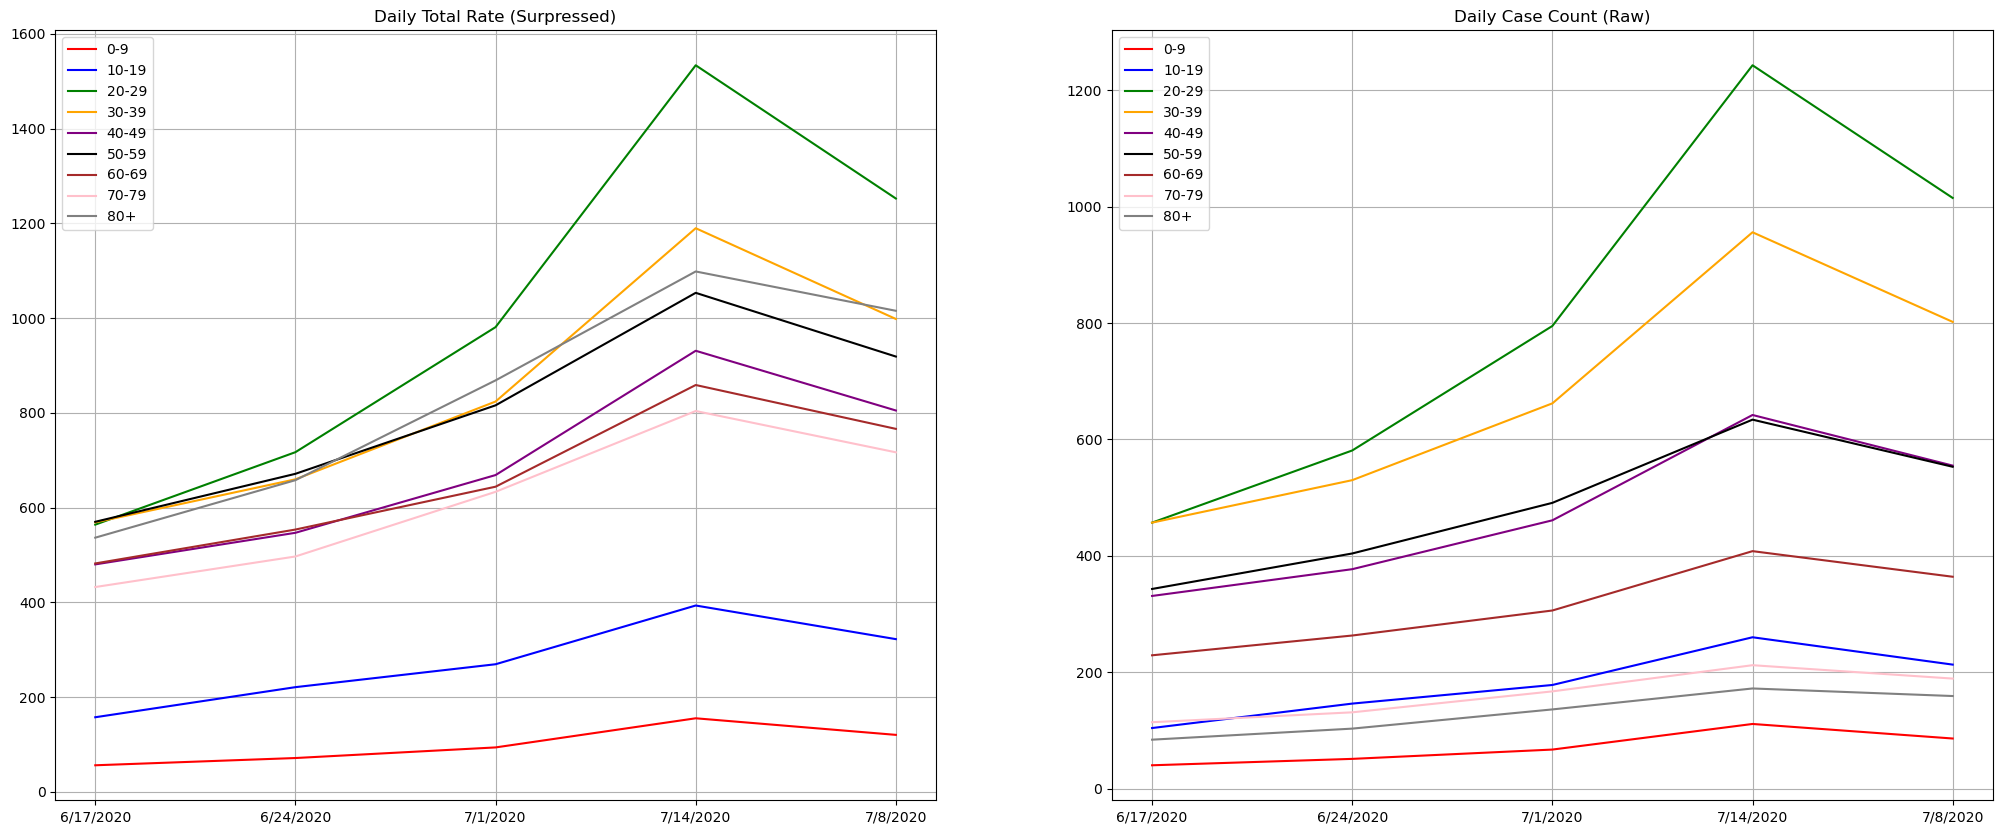

In [13]:
print('================================Central Region========================================')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(central_0_9['Date'], central_0_9['Total Rate (Suppressed)'], label = '0-9', color = 'red')
ax1.plot(central_10_19['Date'], central_10_19['Total Rate (Suppressed)'], label = '10-19', color = 'blue')
ax1.plot(central_20_29['Date'], central_20_29['Total Rate (Suppressed)'], label = '20-29', color = 'green')
ax1.plot(central_30_39['Date'], central_30_39['Total Rate (Suppressed)'], label = '30-39', color = 'orange')
ax1.plot(central_40_49['Date'], central_40_49['Total Rate (Suppressed)'], label = '40-49', color = 'purple')
ax1.plot(central_50_59['Date'], central_50_59['Total Rate (Suppressed)'], label = '50-59', color = 'black')
ax1.plot(central_60_69['Date'], central_60_69['Total Rate (Suppressed)'], label = '60-69', color = 'brown')
ax1.plot(central_70_79['Date'], central_70_79['Total Rate (Suppressed)'], label = '70-79', color = 'pink')
ax1.plot(central_80plus['Date'], central_80plus['Total Rate (Suppressed)'], label = '80+', color = 'gray')
ax1.grid()
ax1.legend(loc = 'upper left')
ax1.set_title('Daily Total Rate (Surpressed)')

ax2.plot(central_0_9['Date'], central_0_9['Case Count (Raw)'], label = '0-9', color = 'red')
ax2.plot(central_10_19['Date'], central_10_19['Case Count (Raw)'], label = '10-19', color = 'blue')
ax2.plot(central_20_29['Date'], central_20_29['Case Count (Raw)'], label = '20-29', color = 'green')
ax2.plot(central_30_39['Date'], central_30_39['Case Count (Raw)'], label = '30-39', color = 'orange')
ax2.plot(central_40_49['Date'], central_40_49['Case Count (Raw)'], label = '40-49', color = 'purple')
ax2.plot(central_50_59['Date'], central_50_59['Case Count (Raw)'], label = '50-59', color = 'black')
ax2.plot(central_60_69['Date'], central_60_69['Case Count (Raw)'], label = '60-69', color = 'brown')
ax2.plot(central_70_79['Date'], central_70_79['Case Count (Raw)'], label = '70-79', color = 'pink')
ax2.plot(central_80plus['Date'], central_80plus['Case Count (Raw)'], label = '80+', color = 'gray')
ax2.grid()
ax2.legend(loc = 'upper left')
ax2.set_title('Daily Case Count (Raw)')

================================East Region========================================


Text(0.5, 1.0, 'Daily Case Count (Raw)')

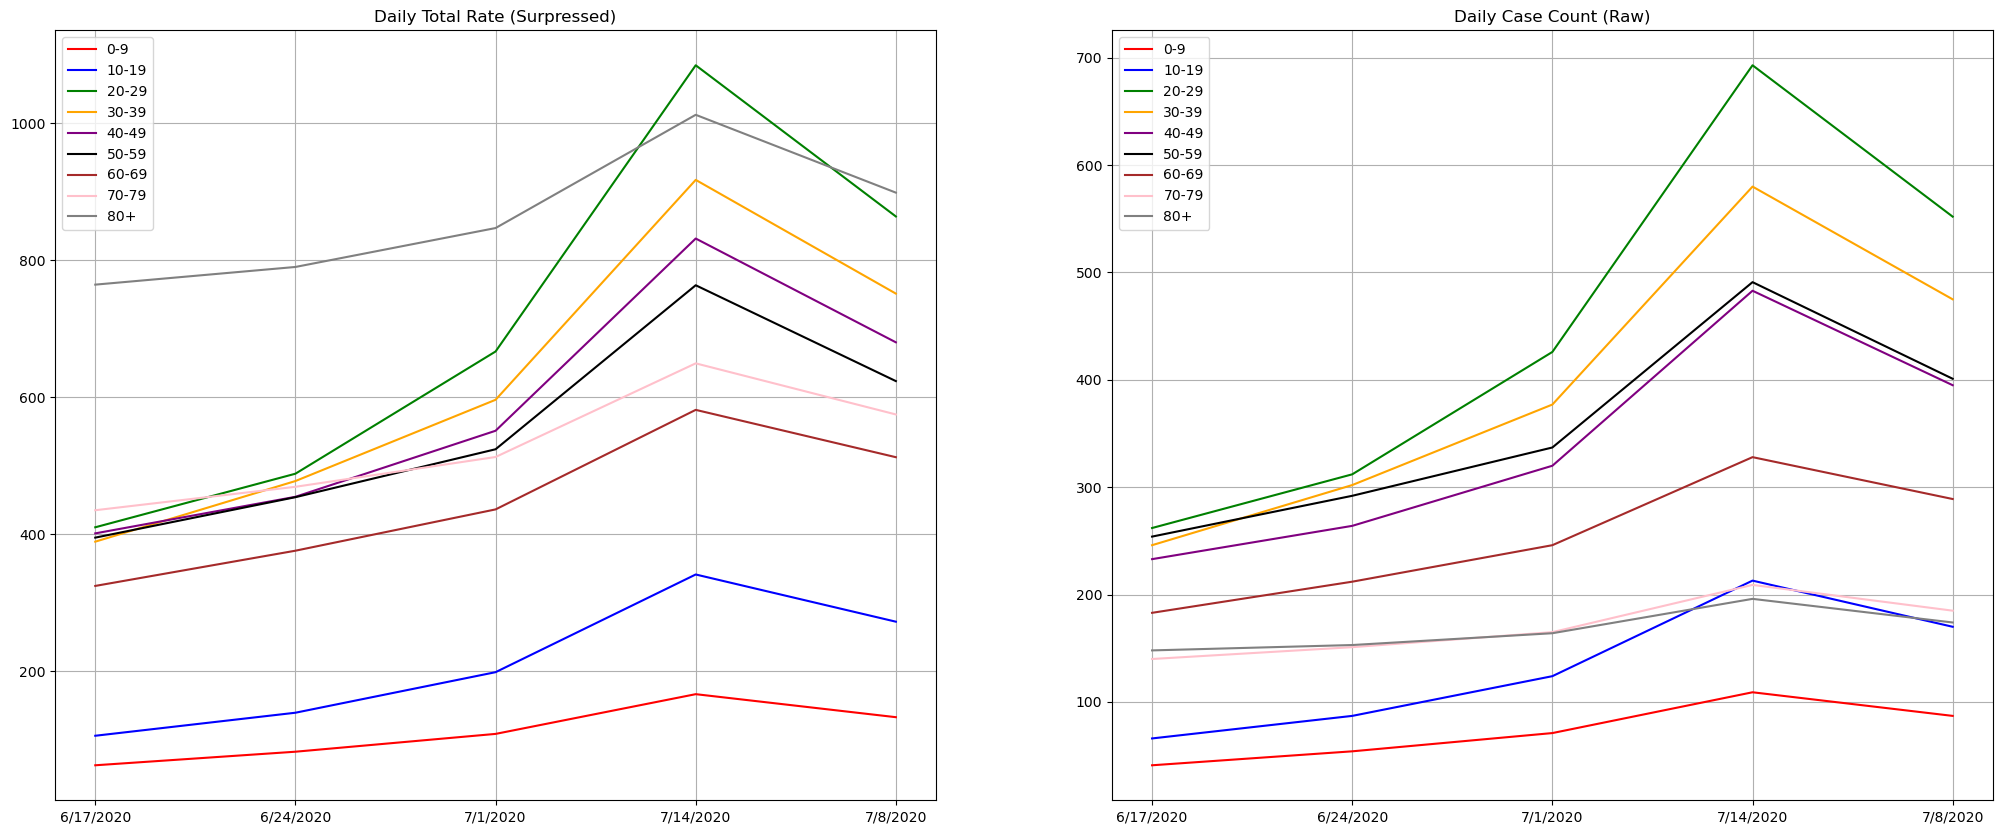

In [14]:
print('================================East Region========================================')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(east_0_9['Date'], east_0_9['Total Rate (Suppressed)'], label = '0-9', color = 'red')
ax1.plot(east_10_19['Date'], east_10_19['Total Rate (Suppressed)'], label = '10-19', color = 'blue')
ax1.plot(east_20_29['Date'], east_20_29['Total Rate (Suppressed)'], label = '20-29', color = 'green')
ax1.plot(east_30_39['Date'], east_30_39['Total Rate (Suppressed)'], label = '30-39', color = 'orange')
ax1.plot(east_40_49['Date'], east_40_49['Total Rate (Suppressed)'], label = '40-49', color = 'purple')
ax1.plot(east_50_59['Date'], east_50_59['Total Rate (Suppressed)'], label = '50-59', color = 'black')
ax1.plot(east_60_69['Date'], east_60_69['Total Rate (Suppressed)'], label = '60-69', color = 'brown')
ax1.plot(east_70_79['Date'], east_70_79['Total Rate (Suppressed)'], label = '70-79', color = 'pink')
ax1.plot(east_80plus['Date'], east_80plus['Total Rate (Suppressed)'], label = '80+', color = 'gray')
ax1.grid()
ax1.legend(loc = 'upper left')
ax1.set_title('Daily Total Rate (Surpressed)')

ax2.plot(east_0_9['Date'], east_0_9['Case Count (Raw)'], label = '0-9', color = 'red')
ax2.plot(east_10_19['Date'], east_10_19['Case Count (Raw)'], label = '10-19', color = 'blue')
ax2.plot(east_20_29['Date'], east_20_29['Case Count (Raw)'], label = '20-29', color = 'green')
ax2.plot(east_30_39['Date'], east_30_39['Case Count (Raw)'], label = '30-39', color = 'orange')
ax2.plot(east_40_49['Date'], east_40_49['Case Count (Raw)'], label = '40-49', color = 'purple')
ax2.plot(east_50_59['Date'], east_50_59['Case Count (Raw)'], label = '50-59', color = 'black')
ax2.plot(east_60_69['Date'], east_60_69['Case Count (Raw)'], label = '60-69', color = 'brown')
ax2.plot(east_70_79['Date'], east_70_79['Case Count (Raw)'], label = '70-79', color = 'pink')
ax2.plot(east_80plus['Date'], east_80plus['Case Count (Raw)'], label = '80+', color = 'gray')  
ax2.grid()
ax2.legend(loc = 'upper left')
ax2.set_title('Daily Case Count (Raw)')

================================North Central Region========================================


Text(0.5, 1.0, 'Daily Case Count (Raw)')

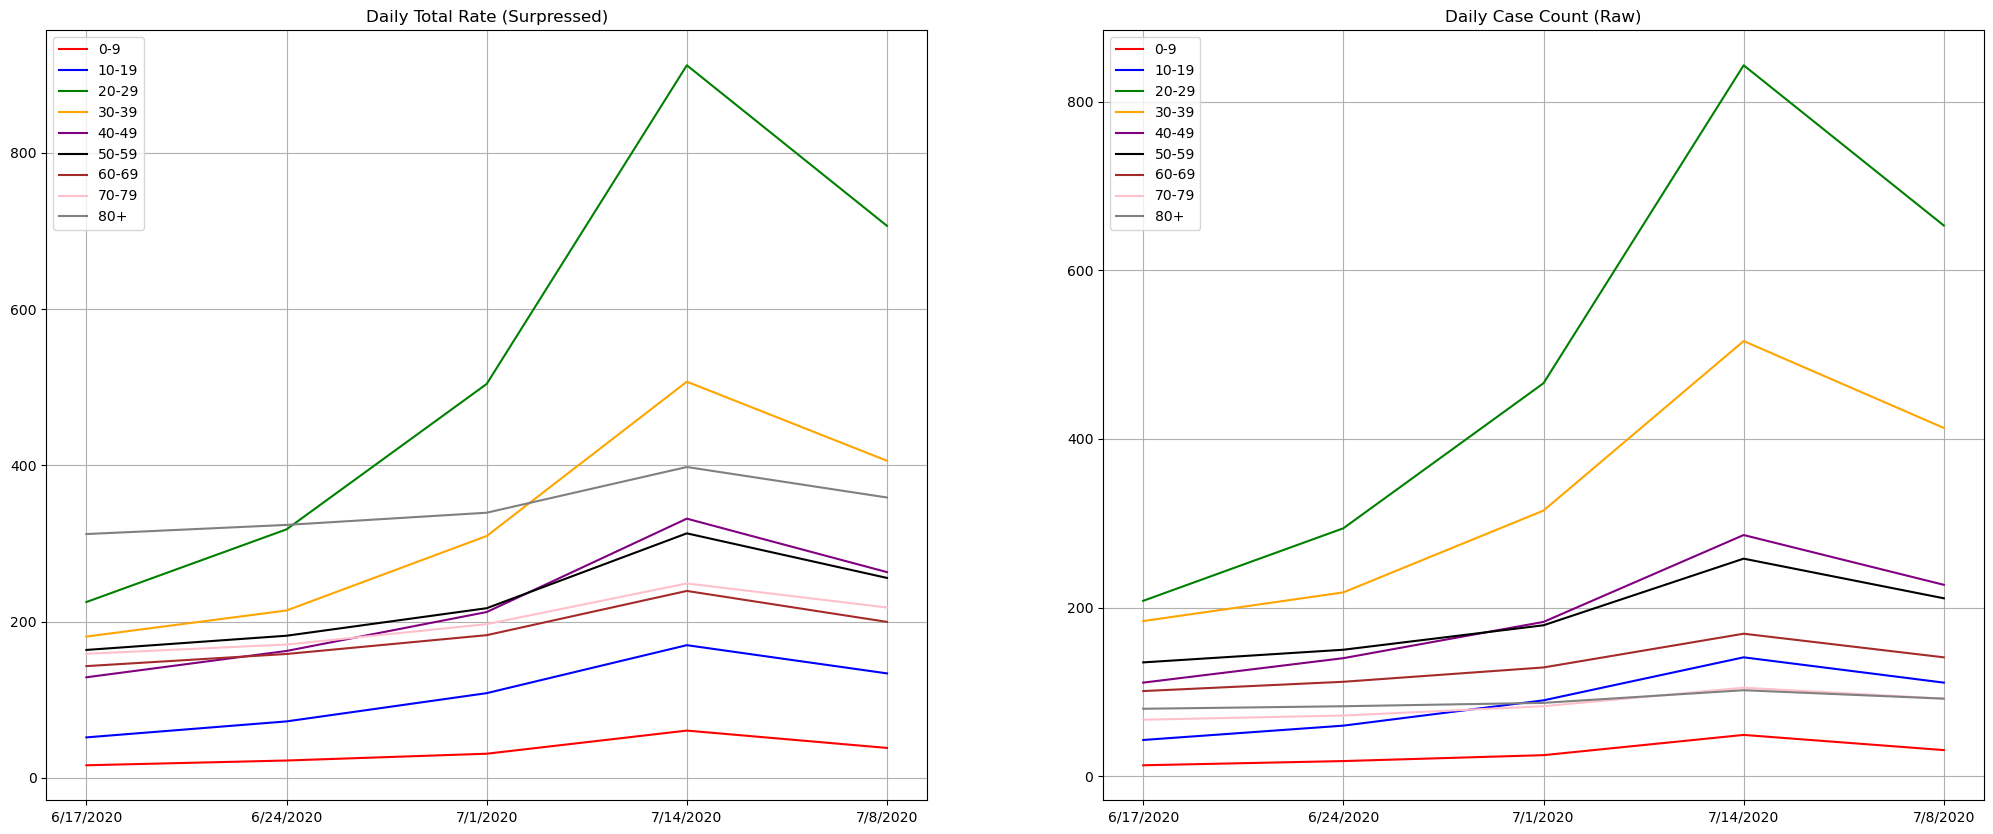

In [15]:
print('================================North Central Region========================================')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(north_central_0_9['Date'], north_central_0_9['Total Rate (Suppressed)'], label = '0-9', color = 'red')
ax1.plot(north_central_10_19['Date'], north_central_10_19['Total Rate (Suppressed)'], label = '10-19', color = 'blue')
ax1.plot(north_central_20_29['Date'], north_central_20_29['Total Rate (Suppressed)'], label = '20-29', color = 'green')
ax1.plot(north_central_30_39['Date'], north_central_30_39['Total Rate (Suppressed)'], label = '30-39', color = 'orange')
ax1.plot(north_central_40_49['Date'], north_central_40_49['Total Rate (Suppressed)'], label = '40-49', color = 'purple')
ax1.plot(north_central_50_59['Date'], north_central_50_59['Total Rate (Suppressed)'], label = '50-59', color = 'black')
ax1.plot(north_central_60_69['Date'], north_central_60_69['Total Rate (Suppressed)'], label = '60-69', color = 'brown')
ax1.plot(north_central_70_79['Date'], north_central_70_79['Total Rate (Suppressed)'], label = '70-79', color = 'pink')
ax1.plot(north_central_80plus['Date'], north_central_80plus['Total Rate (Suppressed)'], label = '80+', color = 'gray')
ax1.grid()
ax1.legend(loc = 'upper left')
ax1.set_title('Daily Total Rate (Surpressed)')

ax2.plot(north_central_0_9['Date'], north_central_0_9['Case Count (Raw)'], label = '0-9', color = 'red')
ax2.plot(north_central_10_19['Date'], north_central_10_19['Case Count (Raw)'], label = '10-19', color = 'blue')
ax2.plot(north_central_20_29['Date'], north_central_20_29['Case Count (Raw)'], label = '20-29', color = 'green')
ax2.plot(north_central_30_39['Date'], north_central_30_39['Case Count (Raw)'], label = '30-39', color = 'orange')
ax2.plot(north_central_40_49['Date'], north_central_40_49['Case Count (Raw)'], label = '40-49', color = 'purple')
ax2.plot(north_central_50_59['Date'], north_central_50_59['Case Count (Raw)'], label = '50-59', color = 'black')
ax2.plot(north_central_60_69['Date'], north_central_60_69['Case Count (Raw)'], label = '60-69', color = 'brown')
ax2.plot(north_central_70_79['Date'], north_central_70_79['Case Count (Raw)'], label = '70-79', color = 'pink')
ax2.plot(north_central_80plus['Date'], north_central_80plus['Case Count (Raw)'], label = '80+', color = 'gray')
ax2.grid()
ax2.legend(loc = 'upper left')
ax2.set_title('Daily Case Count (Raw)')

================================North Coastal Region========================================


Text(0.5, 1.0, 'Daily Case Count (Raw)')

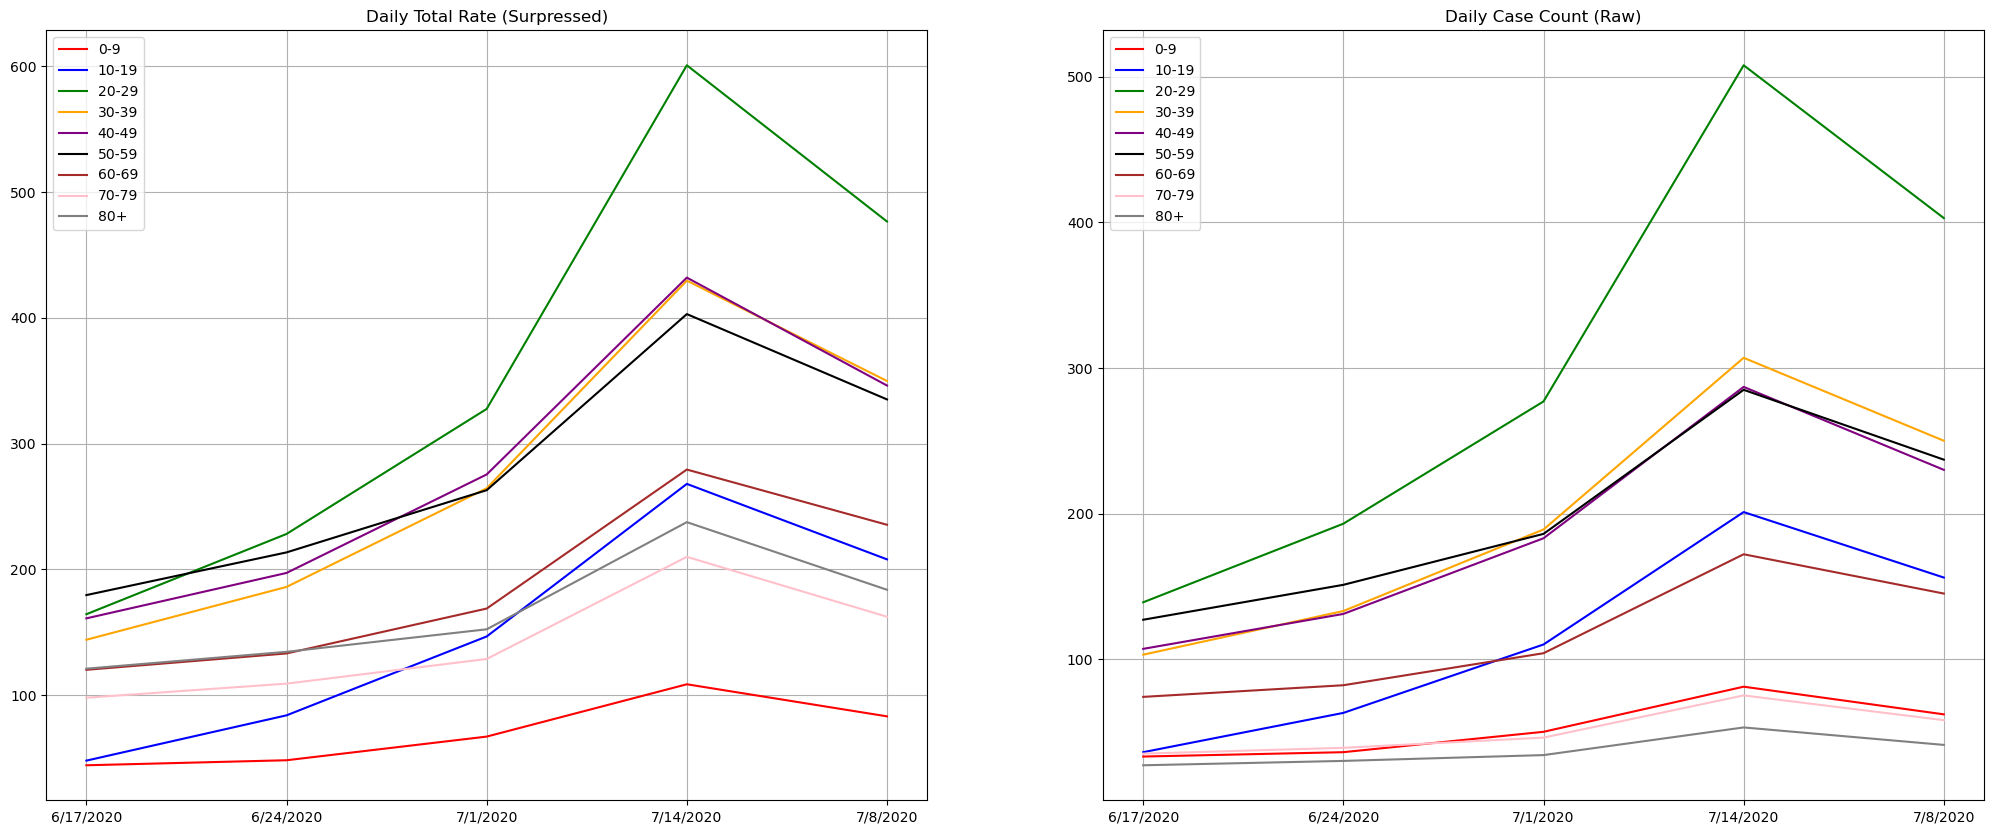

In [16]:
print('================================North Coastal Region========================================')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(north_coastal_0_9['Date'], north_coastal_0_9['Total Rate (Suppressed)'], label = '0-9', color = 'red')
ax1.plot(north_coastal_10_19['Date'], north_coastal_10_19['Total Rate (Suppressed)'], label = '10-19', color = 'blue')
ax1.plot(north_coastal_20_29['Date'], north_coastal_20_29['Total Rate (Suppressed)'], label = '20-29', color = 'green')
ax1.plot(north_coastal_30_39['Date'], north_coastal_30_39['Total Rate (Suppressed)'], label = '30-39', color = 'orange')
ax1.plot(north_coastal_40_49['Date'], north_coastal_40_49['Total Rate (Suppressed)'], label = '40-49', color = 'purple')
ax1.plot(north_coastal_50_59['Date'], north_coastal_50_59['Total Rate (Suppressed)'], label = '50-59', color = 'black')
ax1.plot(north_coastal_60_69['Date'], north_coastal_60_69['Total Rate (Suppressed)'], label = '60-69', color = 'brown')
ax1.plot(north_coastal_70_79['Date'], north_coastal_70_79['Total Rate (Suppressed)'], label = '70-79', color = 'pink')
ax1.plot(north_coastal_80plus['Date'], north_coastal_80plus['Total Rate (Suppressed)'], label = '80+', color = 'gray')
ax1.grid()
ax1.legend(loc = 'upper left')
ax1.set_title('Daily Total Rate (Surpressed)')

ax2.plot(north_coastal_0_9['Date'], north_coastal_0_9['Case Count (Raw)'], label = '0-9', color = 'red')
ax2.plot(north_coastal_10_19['Date'], north_coastal_10_19['Case Count (Raw)'], label = '10-19', color = 'blue')
ax2.plot(north_coastal_20_29['Date'], north_coastal_20_29['Case Count (Raw)'], label = '20-29', color = 'green')
ax2.plot(north_coastal_30_39['Date'], north_coastal_30_39['Case Count (Raw)'], label = '30-39', color = 'orange')
ax2.plot(north_coastal_40_49['Date'], north_coastal_40_49['Case Count (Raw)'], label = '40-49', color = 'purple')
ax2.plot(north_coastal_50_59['Date'], north_coastal_50_59['Case Count (Raw)'], label = '50-59', color = 'black')
ax2.plot(north_coastal_60_69['Date'], north_coastal_60_69['Case Count (Raw)'], label = '60-69', color = 'brown')
ax2.plot(north_coastal_70_79['Date'], north_coastal_70_79['Case Count (Raw)'], label = '70-79', color = 'pink')
ax2.plot(north_coastal_80plus['Date'], north_coastal_80plus['Case Count (Raw)'], label = '80+', color = 'gray')
ax2.grid()
ax2.legend(loc = 'upper left')
ax2.set_title('Daily Case Count (Raw)')

================================North Inland Region========================================


Text(0.5, 1.0, 'Daily Case Count (Raw)')

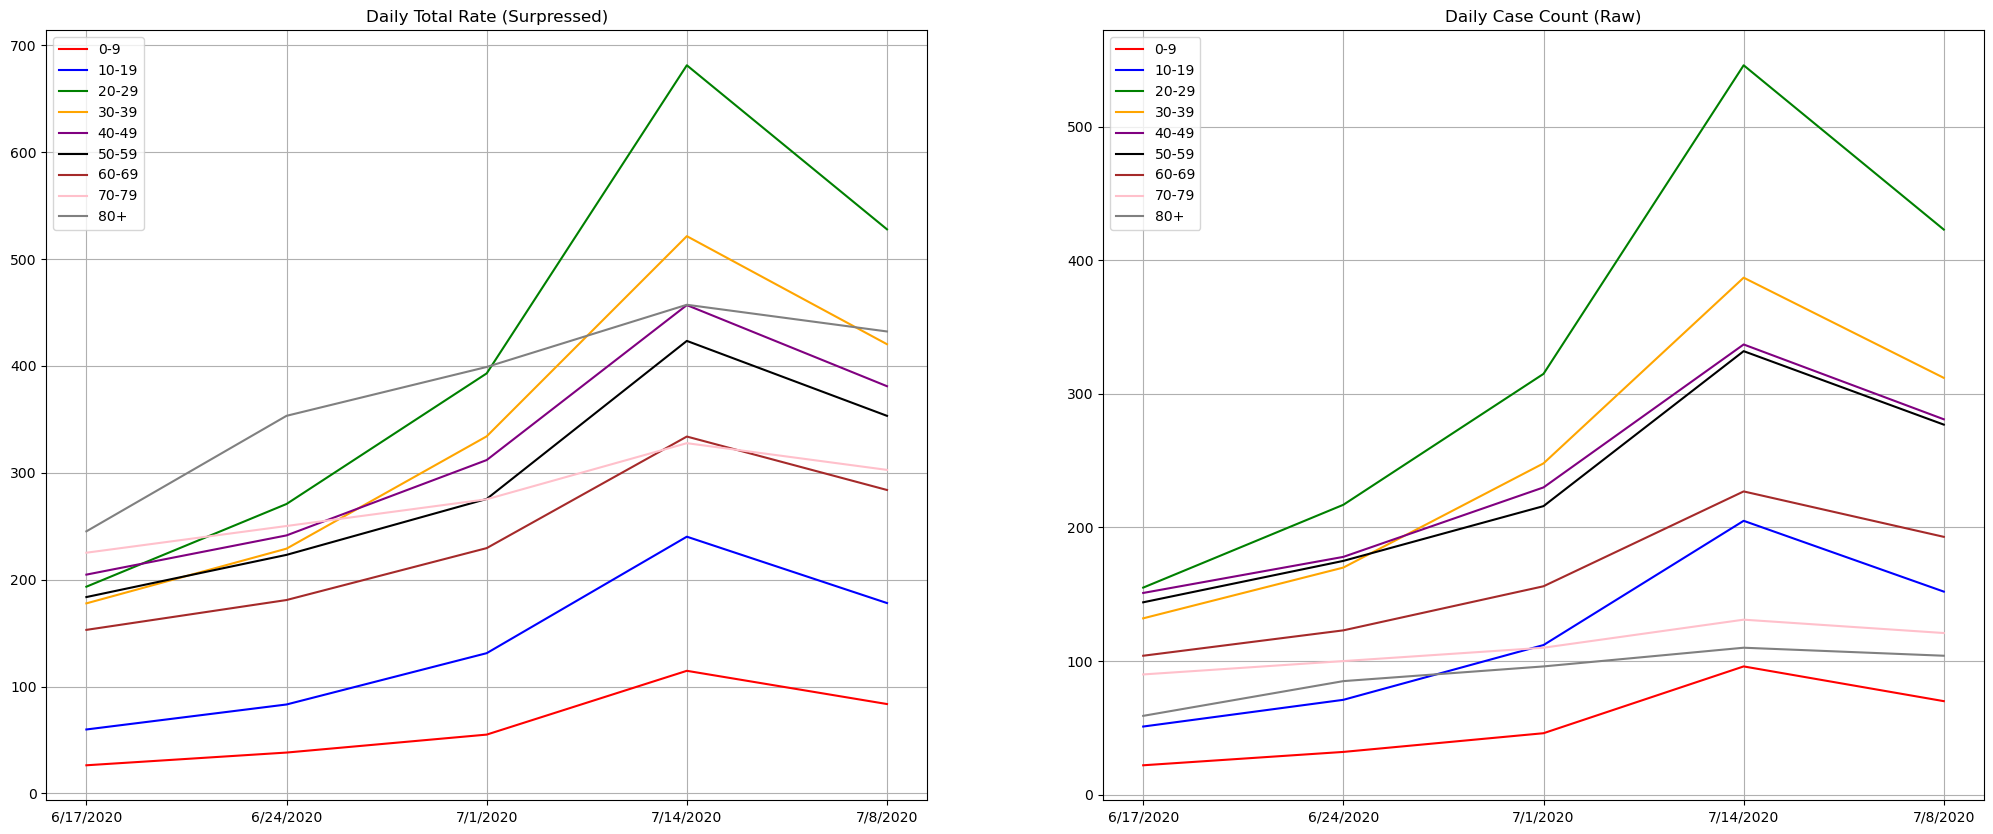

In [17]:
print('================================North Inland Region========================================')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(north_inland_0_9['Date'], north_inland_0_9['Total Rate (Suppressed)'], label = '0-9', color = 'red')
ax1.plot(north_inland_10_19['Date'], north_inland_10_19['Total Rate (Suppressed)'], label = '10-19', color = 'blue')
ax1.plot(north_inland_20_29['Date'], north_inland_20_29['Total Rate (Suppressed)'], label = '20-29', color = 'green')
ax1.plot(north_inland_30_39['Date'], north_inland_30_39['Total Rate (Suppressed)'], label = '30-39', color = 'orange')
ax1.plot(north_inland_40_49['Date'], north_inland_40_49['Total Rate (Suppressed)'], label = '40-49', color = 'purple')
ax1.plot(north_inland_50_59['Date'], north_inland_50_59['Total Rate (Suppressed)'], label = '50-59', color = 'black')
ax1.plot(north_inland_60_69['Date'], north_inland_60_69['Total Rate (Suppressed)'], label = '60-69', color = 'brown')
ax1.plot(north_inland_70_79['Date'], north_inland_70_79['Total Rate (Suppressed)'], label = '70-79', color = 'pink')
ax1.plot(north_inland_80plus['Date'], north_inland_80plus['Total Rate (Suppressed)'], label = '80+', color = 'gray')
ax1.grid()
ax1.legend(loc = 'upper left')
ax1.set_title('Daily Total Rate (Surpressed)')

ax2.plot(north_inland_0_9['Date'], north_inland_0_9['Case Count (Raw)'], label = '0-9', color = 'red')
ax2.plot(north_inland_10_19['Date'], north_inland_10_19['Case Count (Raw)'], label = '10-19', color = 'blue')
ax2.plot(north_inland_20_29['Date'], north_inland_20_29['Case Count (Raw)'], label = '20-29', color = 'green')
ax2.plot(north_inland_30_39['Date'], north_inland_30_39['Case Count (Raw)'], label = '30-39', color = 'orange')
ax2.plot(north_inland_40_49['Date'], north_inland_40_49['Case Count (Raw)'], label = '40-49', color = 'purple')
ax2.plot(north_inland_50_59['Date'], north_inland_50_59['Case Count (Raw)'], label = '50-59', color = 'black')
ax2.plot(north_inland_60_69['Date'], north_inland_60_69['Case Count (Raw)'], label = '60-69', color = 'brown')
ax2.plot(north_inland_70_79['Date'], north_inland_70_79['Case Count (Raw)'], label = '70-79', color = 'pink')
ax2.plot(north_inland_80plus['Date'], north_inland_80plus['Case Count (Raw)'], label = '80+', color = 'gray')
ax2.grid()
ax2.legend(loc = 'upper left')
ax2.set_title('Daily Case Count (Raw)')

================================South Region========================================


Text(0.5, 1.0, 'Daily Case Count (Raw)')

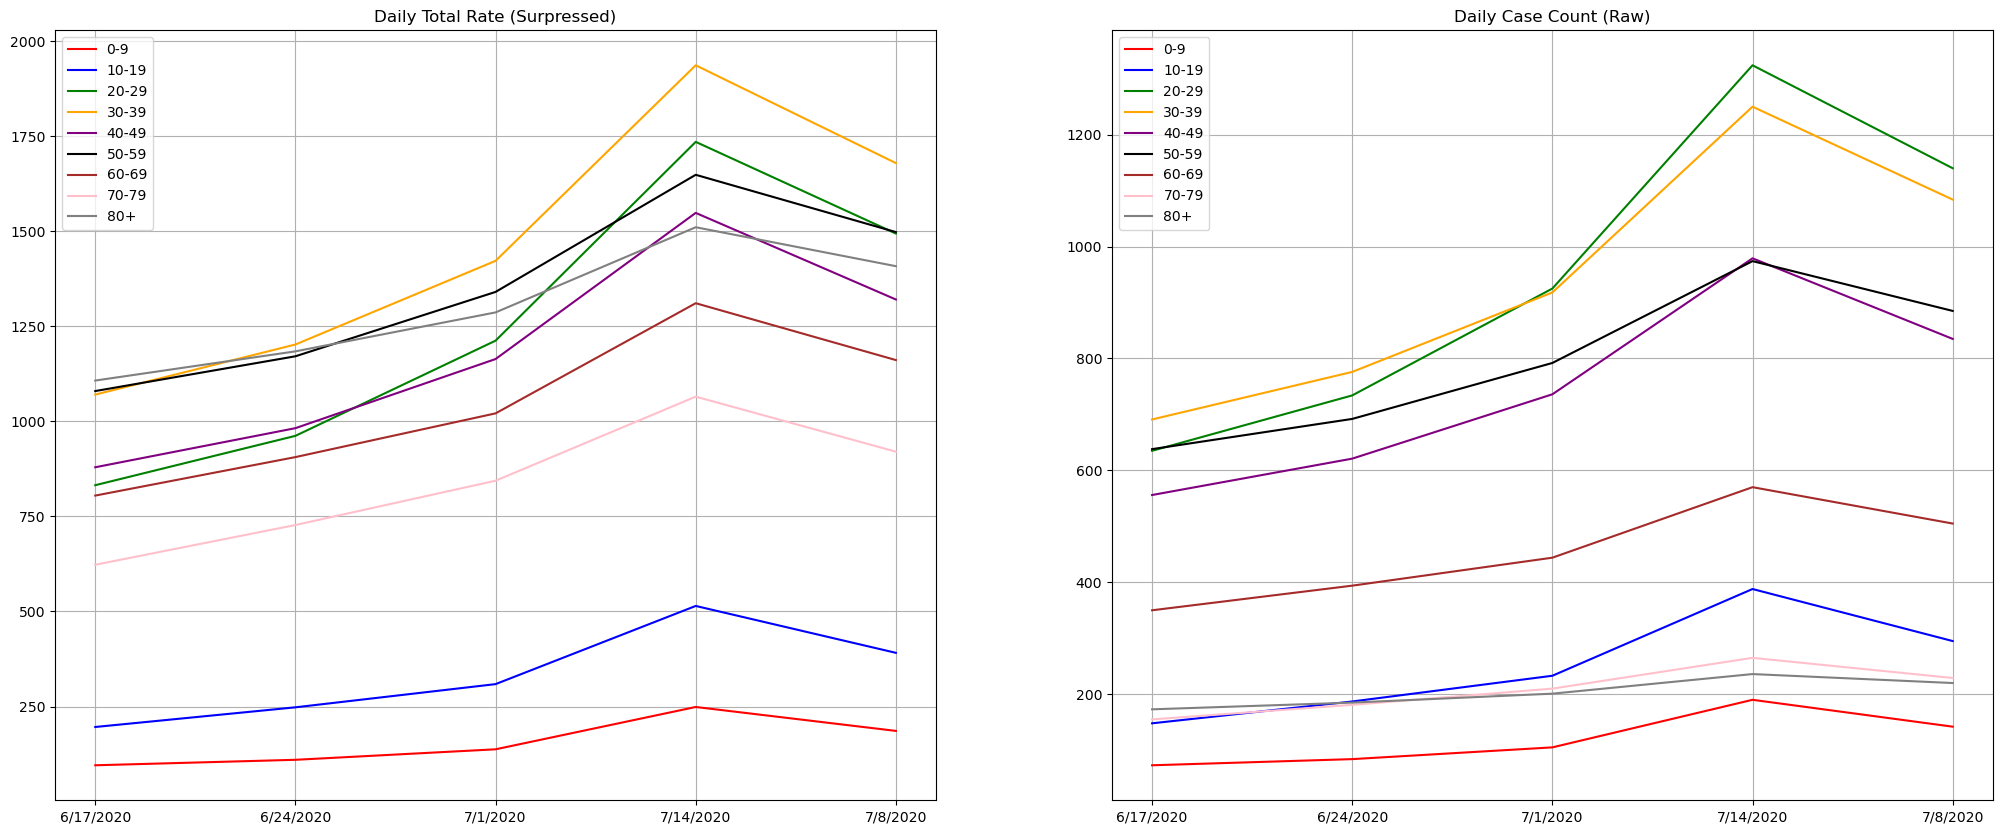

In [18]:
print('================================South Region========================================')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.plot(south_0_9['Date'], south_0_9['Total Rate (Suppressed)'], label = '0-9', color = 'red')
ax1.plot(south_10_19['Date'], south_10_19['Total Rate (Suppressed)'], label = '10-19', color = 'blue')
ax1.plot(south_20_29['Date'], south_20_29['Total Rate (Suppressed)'], label = '20-29', color = 'green')
ax1.plot(south_30_39['Date'], south_30_39['Total Rate (Suppressed)'], label = '30-39', color = 'orange')
ax1.plot(south_40_49['Date'], south_40_49['Total Rate (Suppressed)'], label = '40-49', color = 'purple')
ax1.plot(south_50_59['Date'], south_50_59['Total Rate (Suppressed)'], label = '50-59', color = 'black')
ax1.plot(south_60_69['Date'], south_60_69['Total Rate (Suppressed)'], label = '60-69', color = 'brown')
ax1.plot(south_70_79['Date'], south_70_79['Total Rate (Suppressed)'], label = '70-79', color = 'pink')
ax1.plot(south_80plus['Date'], south_80plus['Total Rate (Suppressed)'], label = '80+', color = 'gray')
ax1.grid()
ax1.legend(loc = 'upper left')
ax1.set_title('Daily Total Rate (Surpressed)')

ax2.plot(south_0_9['Date'], south_0_9['Case Count (Raw)'], label = '0-9', color = 'red')
ax2.plot(south_10_19['Date'], south_10_19['Case Count (Raw)'], label = '10-19', color = 'blue')
ax2.plot(south_20_29['Date'], south_20_29['Case Count (Raw)'], label = '20-29', color = 'green')
ax2.plot(south_30_39['Date'], south_30_39['Case Count (Raw)'], label = '30-39', color = 'orange')
ax2.plot(south_40_49['Date'], south_40_49['Case Count (Raw)'], label = '40-49', color = 'purple')
ax2.plot(south_50_59['Date'], south_50_59['Case Count (Raw)'], label = '50-59', color = 'black')
ax2.plot(south_60_69['Date'], south_60_69['Case Count (Raw)'], label = '60-69', color = 'brown')
ax2.plot(south_70_79['Date'], south_70_79['Case Count (Raw)'], label = '70-79', color = 'pink')
ax2.plot(south_80plus['Date'], south_80plus['Case Count (Raw)'], label = '80+', color = 'gray')
ax2.grid()
ax2.legend(loc = 'upper left')
ax2.set_title('Daily Case Count (Raw)')

## By Race

In [19]:
asian = pd.read_csv('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Race/Asian/all-Asian.csv', header = None)
asian_pacific = pd.read_csv('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Race/API/all-API.csv', header = None)
african_american = pd.read_csv('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Race/Black/all-Black.csv', header = None)
hispanic = pd.read_csv('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Race/Hispanic/all-Hispanic.csv', header = None)
mixed = pd.read_csv('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Race/Multiple/all-Multiple.csv', header = None)
white = pd.read_csv('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Race/White/all-White.csv', header = None)

In [20]:
asian.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
asian_pacific.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
african_american.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
hispanic.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
mixed.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']
white.columns = ['Regions', 'Case Count (Raw)', 'Total Rate (Suppressed)', 'Date']

In [21]:
asian

,Regions,Case Count (Raw),Total Rate (Suppressed),Date
0,Central_Region,NaN,NaN,6/3/2020
1,Central_Region,NaN,NaN,7/1/2020
2,Central_Region,NaN,NaN,7/8/2020
3,Central_Region,6.0,292.300,7/14/2020
4,East_Region,NaN,NaN,7/1/2020
5,East_Region,NaN,NaN,7/14/2020
6,East_Region,NaN,NaN,7/8/2020
7,East_Region,5.0,202.511,6/3/2020
8,North_Central_Region,NaN,NaN,6/3/2020
9,North_Central_Region,NaN,NaN,7/1/2020


In [22]:
central_asian = asian[asian['Regions'] == 'Central_Region']
central_asian_pacific = asian_pacific[asian_pacific['Regions'] == 'Central_Region']
central_african_american = african_american[african_american['Regions'] == 'Central_Region']
central_hispanic = hispanic[hispanic['Regions'] == 'Central_Region']
central_mixed = mixed[mixed['Regions'] == 'Central_Region']
central_white = white[white['Regions'] == 'Central_Region']

east_asian = asian[asian['Regions'] == 'East_Region']
east_asian_pacific = asian_pacific[asian_pacific['Regions'] == 'East_Region']
east_african_american = african_american[african_american['Regions'] == 'East_Region']
east_hispanic = hispanic[hispanic['Regions'] == 'East_Region']
east_mixed = mixed[mixed['Regions'] == 'East_Region']
east_white = white[white['Regions'] == 'East_Region']

north_central_asian = asian[asian['Regions'] == 'North_Central_Region']
north_central_asian_pacific = asian_pacific[asian_pacific['Regions'] == 'North_Central_Region']
north_central_african_american = african_american[african_american['Regions'] == 'North_Central_Region']
north_central_hispanic  = hispanic[hispanic['Regions'] == 'North_Central_Region']
north_central_mixed = mixed[mixed['Regions'] == 'North_Central_Region']
north_central_white = white[white['Regions'] == 'North_Central_Region']

north_coastal_asian = asian[asian['Regions'] == 'North_Coastal_Region']
north_coastal_asian_pacific = asian_pacific[asian_pacific['Regions'] == 'North_Coastal_Region']
north_coastal_african_american = african_american[african_american['Regions'] == 'North_Coastal_Region']
north_coastal_hispanic = hispanic[hispanic['Regions'] == 'North_Coastal_Region']
north_coastal_mixed = mixed[mixed['Regions'] == 'North_Coastal_Region']
north_coastal_white = white[white['Regions'] == 'North_Coastal_Region']

north_inland_asian = asian[asian['Regions'] == 'North_Inland_Region']
north_inland_asian_pacific = asian_pacific[asian_pacific['Regions'] == 'North_Inland_Region']
north_inland_african_american = african_american[african_american['Regions'] == 'North_Inland_Region']
north_inland_hispanic = hispanic[hispanic['Regions'] == 'North_Inland_Region']
north_inland_mixed = mixed[mixed['Regions'] == 'North_Inland_Region']
north_inland_white = white[white['Regions'] == 'North_Inland_Region']

south_asian = asian[asian['Regions'] == 'South_Region']
south_asian_pacific = asian_pacific[asian_pacific['Regions'] == 'South_Region']
south_african_american = african_american[african_american['Regions'] == 'South_Region']
south_hispanic = hispanic[hispanic['Regions'] == 'South_Region']
south_mixed = mixed[mixed['Regions'] == 'South_Region']
south_white = white[white['Regions'] == 'South_Region']